<a href="https://colab.research.google.com/github/relfaza/Tugas-Praktik-Clustering/blob/main/Praktik_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anggota Kelompok
- Farrel Faza (24523031)
- Muhammad Hafizh Hakim 24523062

# Tugas Praktik Clustering
**Nama Dataset:** Mall Customer Segmentation  
**Sumber:** Kaggle  

## Deskripsi Dataset

Dataset Mall Customers dipilih karena memiliki karakteristik numerik yang sesuai
untuk analisis clustering, khususnya dalam mengelompokkan pelanggan berdasarkan
pendapatan tahunan dan skor pengeluaran.

Dataset ini berisi data pelanggan sebuah pusat perbelanjaan yang digunakan untuk melakukan segmentasi pelanggan berdasarkan karakteristik dan perilaku belanja.

Dataset ini tidak memiliki label sehingga sangat cocok untuk metode *unsupervised learning* khususnya clustering.

## Atribut Dataset

| Atribut | Deskripsi |
|------|---------|
| CustomerID | ID unik pelanggan |
| Genre | Jenis kelamin pelanggan |
| Age | Usia pelanggan |
| Annual Income (k$) | Pendapatan tahunan pelanggan |
| Spending Score (1–100) | Skor perilaku belanja pelanggan |

Pada proses clustering, atribut `CustomerID` tidak digunakan karena hanya bersifat identifier.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
X = df.select_dtypes(include=np.number)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Hasil Eksplorasi Data

Berdasarkan eksplorasi awal dataset:
- Dataset terdiri dari 200 data pelanggan
- Tidak ditemukan nilai kosong (missing value)
- Atribut numerik memiliki rentang nilai yang wajar
- Dataset siap digunakan untuk tahap preprocessing dan clustering

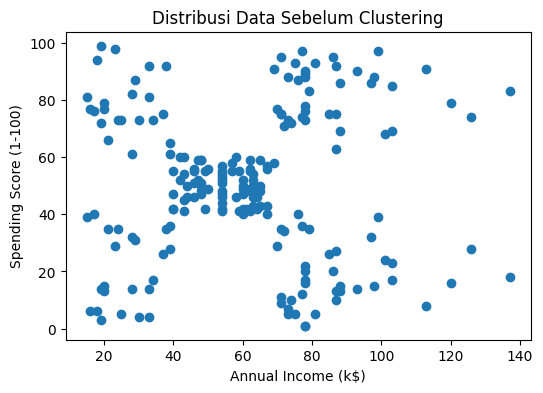

In [30]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
plt.figure(figsize=(6,4))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Distribusi Data Sebelum Clustering")
plt.show()


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

# K-MEANS
K-Means merupakan algoritma clustering berbasis centroid yang membagi data ke dalam K cluster dengan meminimalkan jarak antar data dan pusat cluster.  
Algoritma ini cocok untuk data dengan pola cluster yang relatif bulat dan terpisah dengan jelas.

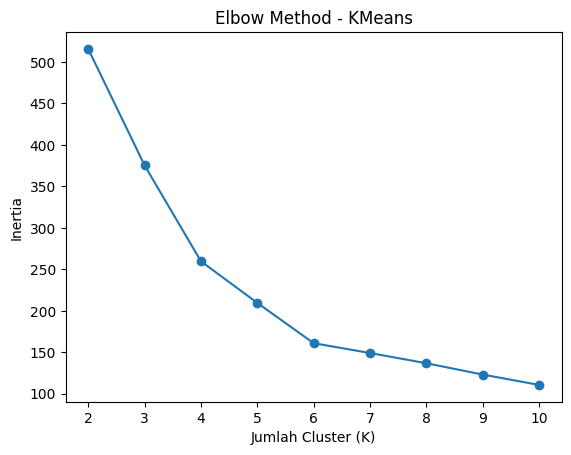

In [16]:
inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method - KMeans')
plt.show()

### K-Means Elbow Method
Berdasarkan grafik Elbow Method, terlihat bahwa penurunan inertia terjadi sangat
tajam hingga K=4, kemudian mulai melandai setelahnya. Hal ini menunjukkan bahwa
penambahan cluster setelah K=4 tidak memberikan pengurangan inertia yang signifikan.

Oleh karena itu, jumlah cluster yang dipilih untuk proses K-Means adalah K = 4.


In [15]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [17]:
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print("Silhouette Score K-Means:", kmeans_silhouette)

Silhouette Score K-Means: 0.4140456252637291


### K-Means Silhouette Score
Berdasarkan evaluasi menggunakan Silhouette Score, algoritma K-Means menghasilkan nilai sebesar 0.4148. Nilai ini menunjukkan bahwa hasil clustering tergolong cukup baik, di mana data dalam satu cluster memiliki kemiripan yang relatif tinggi dan antar cluster sudah cukup terpisah, meskipun masih terdapat sedikit tumpang tindih.


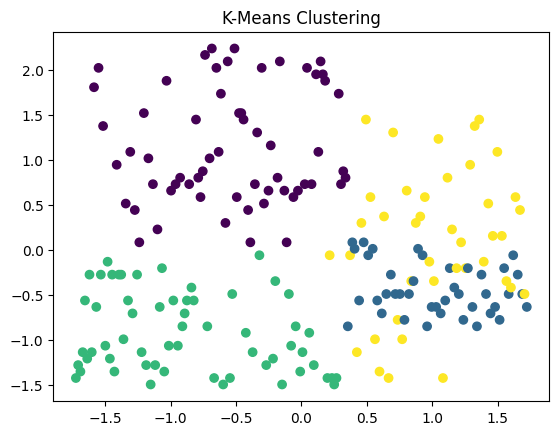

In [20]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering')
plt.show()

#### Hasil & Evaluasi K-Meas
- Silhouette Score K-Means ≈ 0.414

- Menunjukkan kualitas clustering cukup baik

- Cluster terbentuk relatif jelas dan seimbang

Interpretasi:

K-Means mampu membagi pelanggan ke dalam beberapa segmen berdasarkan pendapatan dan pola belanja dengan cukup baik.

# HIERARCHICAL CLUSTERING
Hierarchical Clustering membentuk struktur cluster secara bertahap dari bawah ke atas (agglomerative).  
Metode ini tidak memerlukan penentuan jumlah cluster di awal dan memberikan visualisasi hubungan antar data secara hierarkis.

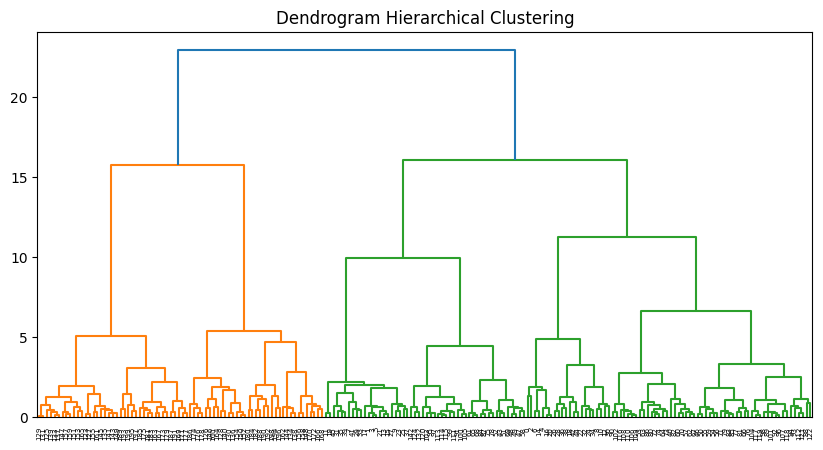

In [19]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram Hierarchical Clustering')
plt.show()

In [21]:
hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(X_scaled)

In [23]:
hc_silhouette = silhouette_score(X_scaled, hc_labels)
print("Silhouette Score Hierarchical:", hc_silhouette)

Silhouette Score Hierarchical: 0.39231254266034143


### Hierarchical Clustering Silhouette Score
Evaluasi menggunakan Silhouette Score pada algoritma Hierarchical Clustering menghasilkan nilai sebesar 0.3923. Nilai ini menunjukkan bahwa kualitas clustering tergolong cukup baik, namun masih terdapat tumpang tindih antar cluster. Dibandingkan dengan K-Means, Hierarchical Clustering memberikan hasil yang sedikit kurang optimal pada dataset ini.

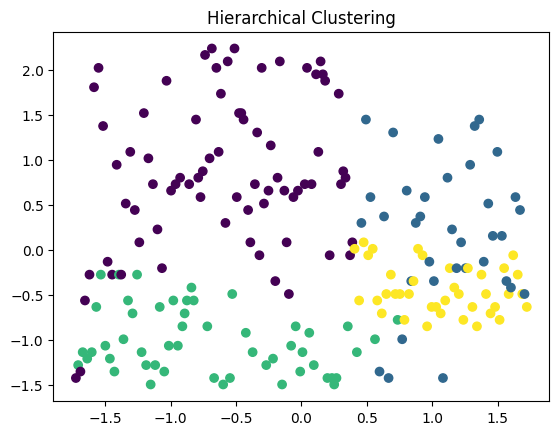

In [24]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=hc_labels)
plt.title('Hierarchical Clustering')
plt.show()

#### Hasil & Evaluasi Hierarchical Clustering
- Silhouette Score Hierarchical ≈ 0.392

- Kualitas clustering cukup baik, namun sedikit di bawah K-Means

Interpretasi:

Hierarchical Clustering menghasilkan pola cluster yang mirip dengan K-Means, tetapi dengan pemisahan yang sedikit kurang optimal.

# DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) membentuk cluster berdasarkan kepadatan data.  
Algoritma ini mampu mendeteksi noise dan cocok untuk data dengan bentuk cluster tidak beraturan.

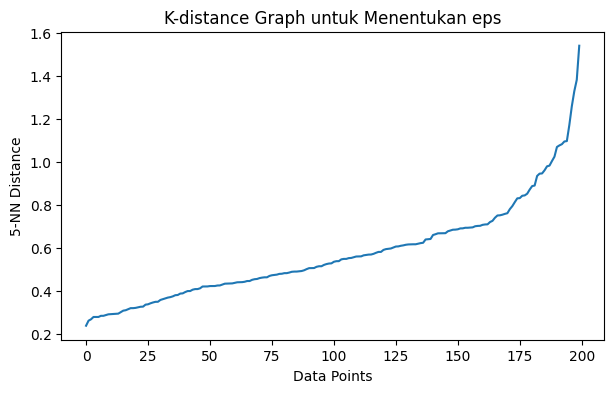

In [27]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])

plt.figure(figsize=(7, 4))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('5-NN Distance')
plt.title('K-distance Graph untuk Menentukan eps')
plt.show()

In [25]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [26]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print("Silhouette Score DBSCAN:", dbscan_silhouette)
else:
    print("DBSCAN hanya menghasilkan 1 cluster")

Silhouette Score DBSCAN: 0.1770595591903895


#### DBSCAN Silhouette Score
Evaluasi DBSCAN menggunakan Silhouette Score menghasilkan nilai sebesar 0.177, yang menunjukkan kualitas clustering kurang baik. Hal ini disebabkan oleh pemilihan parameter DBSCAN yang belum optimal serta karakteristik dataset yang lebih sesuai untuk metode clustering berbasis centroid seperti K-Means.

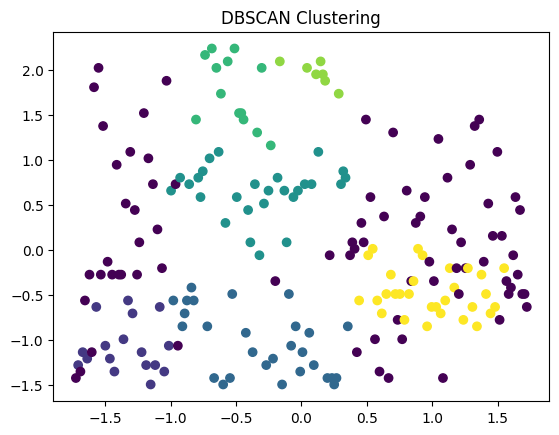

In [28]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

#### Hasil & Evaluasi DBSCAN
- Silhouette Score DBSCAN ≈ 0.177

- Kualitas clustering kurang baik

- Terdapat data yang dianggap sebagai noise (label = -1)

Interpretasi:

DBSCAN kurang cocok untuk dataset ini karena pola data lebih menyerupai cluster berbentuk bulat dan merata, yang lebih sesuai untuk K-Means dan Hierarchical.

### Kesimpulan
Berdasarkan hasil praktik, K-Means menghasilkan kualitas clustering terbaik dengan Silhouette Score tertinggi.
Hierarchical Clustering memberikan hasil yang cukup baik dan mendekati K-Means.
Sementara itu, DBSCAN menunjukkan performa paling rendah karena karakteristik dataset yang kurang sesuai dengan pendekatan berbasis kepadatan.

| Algoritma    | Silhouette Score | Kualitas    |
| ------------ | ---------------- | ----------- |
| K-Means      | ≈ 0.415          | Cukup Baik  |
| Hierarchical | ≈ 0.392          | Cukup       |
| DBSCAN       | ≈ 0.177          | Kurang Baik |
